In [4]:
import PIL
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob

In [232]:
def load_images(path):
    images = []
    for img in glob(path):
        images.append(np.array(PIL.Image.open(img)))
    return images

real_images = load_images('imgs/recordings/*.png')
sim_images = load_images('imgs/simulation/*.png')

[0.32156863 0.41960784 0.52156863]


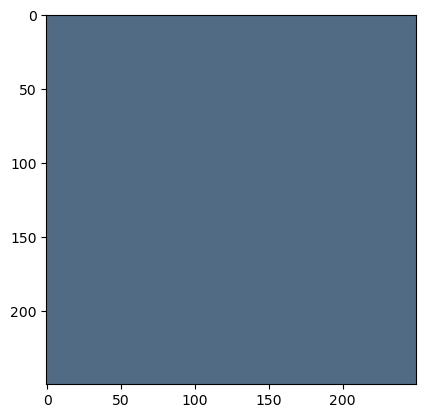

In [330]:

test_blue = [82,107,133]
print(np.array(test_blue)/255)
img = real_images[0]
img = np.zeros_like(img)
img[:,:] = test_blue
plt.imshow(img)

[ 54  91 123]


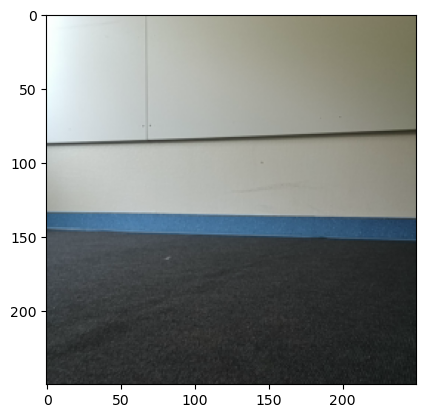

In [328]:
first_img = real_images[2]
print(first_img[150,200])
plt.imshow(first_img)



(64, 64, 3)


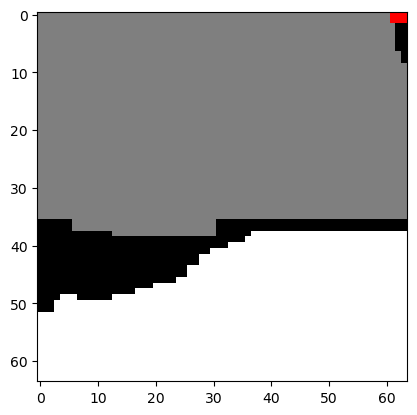

In [329]:
red = [255,0,0]
green = [0,255,0]
white = [255,255,255]
black = [0,0,0]

def segemntation(img):
    img = img.copy()
    img = cv2.resize(img, (64, 64), interpolation=cv2.INTER_AREA)
    
    # BLur the image
    #img = cv2.GaussianBlur(img, (1, 1), 0)
    # Find all Blue pixels

    canny = cv2.Canny(img, 100, 200)

    #img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    print(img.shape)
    #
    predators = np.sqrt(np.sum((img - red)**2, axis=2))
    predators = np.array(predators < 200).astype(np.uint8)
    predators = cv2.dilate(predators, None, iterations=1)




    preys = np.sqrt(np.sum((img - green)**2, axis=2))
    preys = np.array(preys < 200).astype(np.uint8)
    preys = cv2.dilate(preys, None, iterations=1)


    wall = np.sqrt(np.sum((img - white)**2, axis=2))
    wall = np.array(wall < 250).astype(np.uint8)
    wall = cv2.dilate(wall, None, iterations=1)

    robot = np.sqrt(np.sum((img - black)**2, axis=2))
    robot = np.array(robot < 100).astype(np.uint8)
    robot = cv2.dilate(robot, None, iterations=1)


    
    overlay = np.zeros_like(img)
    overlay[wall == 1] = (np.array(white) * 0.5).astype(np.uint8)
    overlay[robot == 1] = white
    overlay[predators == 1] = red
    overlay[preys == 1] = green
    
    

    img = cv2.addWeighted(img, 0.5, overlay, 0.5, 0)


    #result = (predators * [200,0,0] + preys * [200,0,0] + wall * [255,255,255]) * 0.1 + img[:,:] * 0.9

    return overlay

frist_img_segmented = segemntation(first_img)
plt.imshow(frist_img_segmented, cmap='gray')

IndexError: index 14718 is out of bounds for axis 0 with size 6

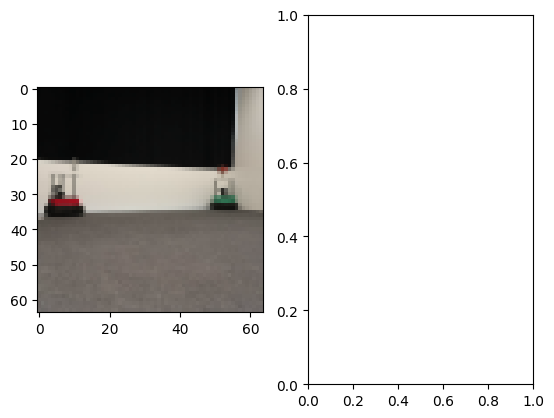

In [15]:
import glob 
import cv2

import AutoEncoder.ae as ae
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

import segment as seg
model = ae.CAE(32,(64,64,3),6,True)

model.load_weights('AutoEncoder/checkpoints/domainRandomized/ae')

imgs = []
for img in glob.glob('imgs/recordings/*.png'):
    img = cv2.imread(img)

    img = cv2.resize(img, (64, 64), interpolation=cv2.INTER_AREA)

    img = img / 255.0   

    imgs.append(img)

imgs = np.array(imgs)

predictions = model(imgs)

fake_features = np.array([[59,59,59],[102,102,102],[178,178,178],[0,255,0],[255,0,0],[0,0,0]])
for i in range(10):
    plt.subplot(1,2,1)
    plt.imshow(imgs[i])
    plt.subplot(1,2,2)
    result = predictions[i].reshape(-1,6)
    result = np.argmax(result,axis=1)
    result = fake_features[result].astype(np.uint8)
    plt.imshow(result)
    plt.imshow(fake_features[np.argmax(predictions[i],axis=).reshape(-1,1)].astype(np.uint8))
    plt.show()
